# PyTorch (2.0) Sample

https://pytorch.org/get-started/locally/

- Dataset
  - load_digits (sklearn.datasets)

In [1]:
from torch import nn, optim
import torch

from sklearn.datasets import load_digits

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
DIGITS = load_digits()

X_raw = DIGITS.data
y_raw = DIGITS.target

display(X_raw.shape, y_raw.shape)

(1797, 64)

(1797,)

In [3]:
X = torch.tensor(X_raw, dtype=torch.float32)
y = torch.tensor(y_raw, dtype=torch.int64)

In [4]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
model.train()
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    model.parameters(),
    lr=0.01
)   

In [5]:
losses = []

for ep in range(100):
    optimizer.zero_grad()
    out = model(X)
    
    loss = lossfun(out, y)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.item())

In [6]:
_, pred = torch.max(out, 1)

print(
    f'{((pred == y).sum().item() / len(y)):.4f}'
)

0.7657


Text(0, 0.5, 'Loss')

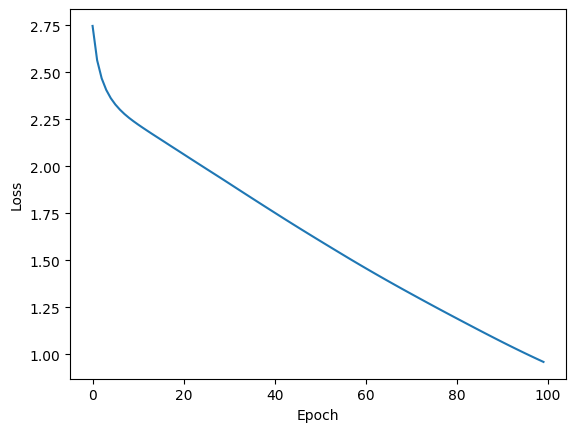

In [7]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')